<a href="https://colab.research.google.com/github/rahiakela/machine-learning-research-and-practice/blob/main/grokking-machine-learning/05-logistic-regression/01_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Logistic Regression

Let's develop the Logistic Regression for our sentiment analysis application.

First we’ll write the code from scratch to fit our original dataset,
and then we’ll use Turi Create. 

In real life, we always use a package and have little need to code our
own algorithms.

##Setup

In [ ]:
!pip -q install turicreate

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

import turicreate as tc

random.seed(0)

In [3]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 100,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    plt.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 100,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    plt.xlabel('aack')
    plt.ylabel('beep')
    plt.legend(['happy','sad'])
    
def draw_line(a,b,c, starting=0, ending=3, **kwargs):
    # Plotting the line ax + by + c = 0
    x = np.linspace(starting, ending, 1000)
    plt.plot(x, -c/b - a*x/b, **kwargs)

##Defining dataset

Let’s begin by defining our dataset as a NumPy array. The features correspond to two numbers
corresponding to the appearances of aack and beep. 

The labels are 1 for the happy sentences and
0 for the sad ones.

In [4]:
features = np.array([[1,0],[0,2],[1,1],[1,2],[1,3],[2,2],[2,3],[3,2]])
labels = np.array([0,0,0,0,1,1,1,1])

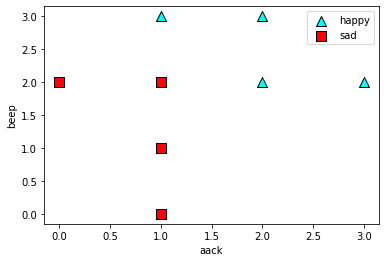

In [5]:
# Plotting the points
plot_points(features, labels)

##Logistic regression

We will use the logistic trick and the logistic regression algorithm by
hand. More generally, we’ll code the logistic regression algorithm for a dataset with $n$ weights.

* Features: $x_1, X_2, ..., x_n$
* Label: $y$
* Weights: $w_1, w_2, ..., w_n$
* Bias: $b$

The score for a particular sentence is the sigmoid of the sum of the weight of each word ($w_i$) times the number of times that appears ($x_i$), plus the bias ($b$).

$$ \sum_{i=1}^n a_i = a_1 + a_2 + ... + a_n $$

* Prediction: $\hat y = \sigma(w_1x_1+w_2x_2+...+w_nx_n + b) = \sigma(\sum_{i=1}^n w_ix_i +b)$



We start by coding the sigmoid function and the prediction.

$$ \sigma(x) = \frac{1}{1+e^{-x}} $$

In [6]:
def sigmoid(x):
  return np.exp(x) / (1 + np.exp(x))

For the score function, we use the dot product between the features and the weights.

In [7]:
def score(weights, bias, features):
  return np.dot(weights, features) + bias

Finally, recall that the prediction is the sigmoid activation function applied to the score.

In [8]:
def prediction(weights, bias, features):
  return sigmoid(score(weights, bias, features))

Now that we have the prediction, we can proceed to the log loss.

$$ log \space loss = -y\log(\hat y)-(1-y) \log(1-\hat y)$$

In [9]:
def log_loss(weights, bias, features, label):
  pred = 1.0 * prediction(weights, bias, features)
  return -label * np.log(pred) - (1 - label) * np.log(1 - pred)

We need the log loss over the whole dataset.

In [10]:
def total_log_loss(weights, bias, features, labels):
  total_error = 0
  for i in range(len(features)):
    total_error += log_loss(weights, bias, features[i], labels[i])
  return total_error / len(features)

Now we are ready to code the logistic regression trick, and the logistic regression algorithm.

In [11]:
def logistic_trick(weights, bias, features, label, learning_rate =0.01):
  pred = prediction(weights, bias, features)
  for i in range(len(weights)):
    weights[i] += (label - pred) * features[i] * learning_rate
    bias += (label - pred) * learning_rate
  return weights, bias

In [13]:
random.seed(0)

def logistic_regression_algorithm(features, labels, learning_rate=0.01, epochs=1000):
  plot_points(features, labels)

  weights = [1.0 for i in range(len(features[0]))]
  bias = 0.0
  errors = []

  for epoch in range(epochs):
    #  remove the plots of all the classifiers
    draw_line(weights[0], weights[1], bias, color='grey', linewidth=1.0, linestyle='dotted')

    error = total_log_loss(weights, bias, features, labels)
    errors.append(error)
    i = random.randint(0, len(features) - 1)
    weights, bias = logistic_trick(weights, bias, features[i], labels[i])

  draw_line(weights[0], weights[1], bias)
  plt.show()
  plt.scatter(range(epochs), errors)
  plt.xlabel("epochs")
  plt.ylabel("error")
  return weights, bias

Now we can run the logistic regression algorithm to build a logistic classifier.

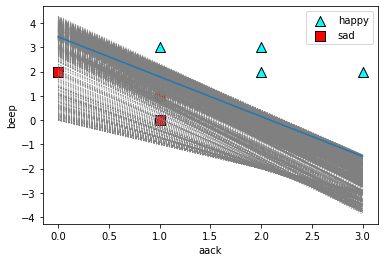

([1.1229291748186512, 0.6842119662568162], -2.349052503259141)

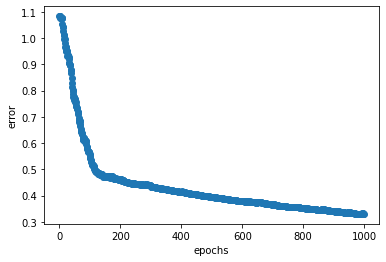

In [14]:
logistic_regression_algorithm(features, labels)

##Logistic regression using Turi Create

Let's create an SFrame with our data from a dictionary.

In [15]:
data_dict = {
    "x1": features[:, 0],
    "x2": features[:, 1],
    "y": labels
}

data = tc.SFrame(data_dict)
data

x1,x2,y
1,0,0
0,2,0
1,1,0
1,2,0
1,3,1
2,2,1
2,3,1
3,2,1


Next, we create and train our perceptron classifier, using the `logistic_classifier` object and
the create method.

In [16]:
classifier = tc.logistic_classifier.create(data, 
                                           features=["x1", "x2"],
                                           target="y",
                                           validation_set=None)

Logistic regression:

--------------------------------------------------------

Number of examples          : 8

Number of classes           : 2

Number of feature columns   : 2

Number of unpacked features : 2

Number of coefficients      : 3

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+-------------------+

| Iteration | Passes   | Elapsed Time | Training Accuracy |

+-----------+----------+--------------+-------------------+

| 1         | 2        | 1.001187     | 1.000000          |

| 2         | 3        | 1.002018     | 1.000000          |

| 3         | 4        | 1.002306     | 1.000000          |

| 4         | 5        | 1.002519     | 1.000000          |

+-----------+----------+--------------+-------------------+

SUCCESS: Optimal solution found.

Finally, we can look at the weights and bias of the model.

In [17]:
classifier.coefficients

name,index,class,value,stderr
(intercept),None,1,-8.959708265685023,6.844844514902371
x1,None,1,2.972553703911967,2.6977310191336046
x2,None,1,2.498635186535742,2.455296103059146


Let's draw the desision boundry.

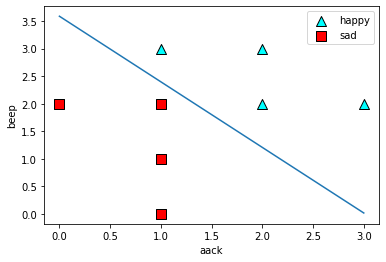

In [20]:
intercept, w1, w2 = classifier.coefficients["value"]

plot_points(features, labels)
draw_line(w1, w2, intercept)